In [ ]:
# ===============================================================
#                     UAS KOMPUTASI STATISTIKA 2                =
#           ---------------------------------------------       =
# Nama          : Tarsan                                        =
# NIM           : B2A021011                                     =
#                                                               =
# ===============================================================

# **SOAL NO. 1**

a. Buatlah fungsi(def) rumus korelasi

In [1]:
import numpy as np
def korelasi (x,y) :
  if len(x)==len(y) :
    Sum_xy = sum ((x-x.mean())*(y-y.mean()))
    Sum_x_squared = sum ((x-x.mean())**2)
    Sum_y_squared = sum ((y-y.mean())**2)
    korelasi = Sum_xy/np.sqrt(Sum_x_squared * Sum_y_squared)
    return korelasi

b. Hitunglah korelasi antar data dengan perhitungan korelasi harus menggunakan perulangan (for)

c. Buatlah fungsi seleksi kondisi (if) untuk menggolongkan jenis korelasi

In [2]:
# Menginput data
data = [
    np.array ([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
    np.array ([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
    np.array ([19, 11, 70, 48, 81, 7, 33, 84, 45, 86]),
    np.array ([26, 58, 39, 48, 88, 50, 86, 16, 92, 67]),
    np.array ([28, 67, 42, 66, 93, 57, 42, 47, 31, 66])
]

In [3]:
# Menghitung jumlah data set
num_data = len (data)
print (num_data)

5


In [4]:
# Inisialisasi data korelasi
korelasi_data = np.zeros((num_data, num_data))

# Menghitung korelasi
for i in range(num_data):
    for j in range(num_data):
        if i != j:  # Hindari menghitung korelasi antara data dengan dirinya sendiri
            # Menghitung korelasi antara dua set data menggunakan fungsi
            korelasi_data [i, j] = korelasi(data[i], data[j])

            # Menampilkan hasil korelasi antar data
            if korelasi_data [i, j]== 1 :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi SEMPURNA sebesar {korelasi_data[i, j]}")
            elif korelasi_data [i, j] >= 0.91 :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi SANGAT KUAT sebesar {korelasi_data[i, j]}")
            elif korelasi_data [i, j] >= 0.71 :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi KUAT sebesar {korelasi_data[i, j]}")
            elif korelasi_data [i, j] >= 0.41 :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi MODERATE sebesar {korelasi_data[i, j]}")
            elif korelasi_data [i, j] >= 0.21 :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi LEMAH sebesar {korelasi_data[i, j]}")
            else :
              print (f"Korelasi antara data {i+1} dan data {j+1} memiliki korelasi SANGAT LEMAH sebesar {korelasi_data[i, j]}")

Korelasi antara data 1 dan data 2 memiliki korelasi SEMPURNA sebesar 1.0
Korelasi antara data 1 dan data 3 memiliki korelasi MODERATE sebesar 0.47466764548101736
Korelasi antara data 1 dan data 4 memiliki korelasi LEMAH sebesar 0.3963296591506153
Korelasi antara data 1 dan data 5 memiliki korelasi SANGAT LEMAH sebesar 0.006486663873509805
Korelasi antara data 2 dan data 1 memiliki korelasi SEMPURNA sebesar 1.0
Korelasi antara data 2 dan data 3 memiliki korelasi MODERATE sebesar 0.47466764548101736
Korelasi antara data 2 dan data 4 memiliki korelasi LEMAH sebesar 0.3963296591506153
Korelasi antara data 2 dan data 5 memiliki korelasi SANGAT LEMAH sebesar 0.006486663873509805
Korelasi antara data 3 dan data 1 memiliki korelasi MODERATE sebesar 0.47466764548101736
Korelasi antara data 3 dan data 2 memiliki korelasi MODERATE sebesar 0.47466764548101736
Korelasi antara data 3 dan data 4 memiliki korelasi SANGAT LEMAH sebesar 0.019320335431385238
Korelasi antara data 3 dan data 5 memiliki kor

d. Buatlah plot scatter plot antar data, dan buatlah heatmap antar data

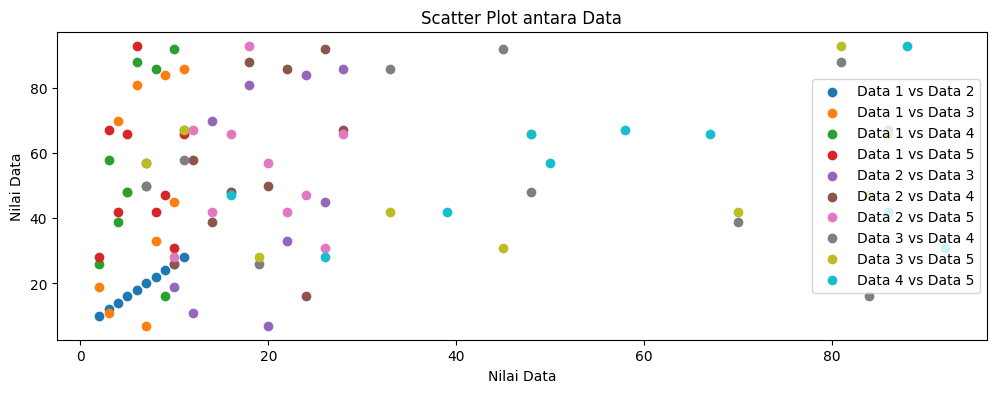

In [5]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot antara data
# Scatter Plot antar data
plt.figure(figsize=(12, 4))
for i in range(num_data):
    for j in range(i+1, num_data):
        plt.scatter(data[i], data[j], label=f'Data {i+1} vs Data {j+1}')

plt.title('Scatter Plot antara Data')
plt.xlabel('Nilai Data')
plt.ylabel('Nilai Data')
plt.legend()
plt.show()

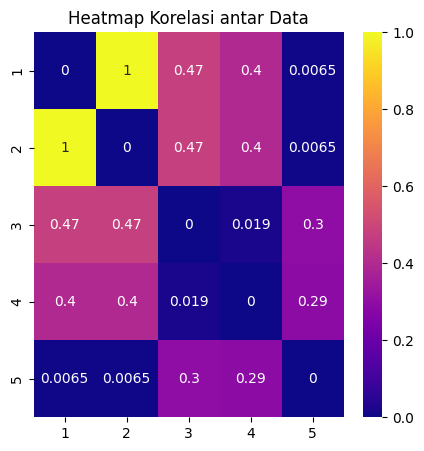

In [6]:
# Membuat heatmap antara data
plt.figure(figsize=(5, 5))
sns.heatmap(korelasi_data, annot=True, cmap='plasma', xticklabels=range(1, num_data+1), yticklabels=range(1, num_data+1))
plt.title('Heatmap Korelasi antar Data')
plt.show()


# **SOAL NO. 2**

Buatlah analisis menggunakan metode Moving average, Double Exponential Smoothing, dan ARIMA, prediksi 3 hari kedepan

# *SIMPLE MOVING AVERAGE*

In [8]:
#Importing time-series data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',
           parse_dates =True)

#Printing dataFrame
data.head()

<ipython-input-8-7f2092a115e3>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',


,Nilai Tukar
Date,
2024-01-01,20
2024-02-01,25
2024-03-01,38
2024-04-01,11
2024-05-01,64


In [9]:
data = data ['Nilai Tukar'].to_frame()
data['SMA3'] = data ['Nilai Tukar'].rolling(3).mean()
data.head(30)

,Nilai Tukar,SMA3
Date,,
2024-01-01,20,NaN
2024-02-01,25,NaN
2024-03-01,38,27.666667
2024-04-01,11,24.666667
2024-05-01,64,37.666667
2024-06-01,77,50.666667
2024-07-01,39,60.000000
2024-08-01,74,63.333333
2024-09-01,49,54.000000


In [10]:
data.dropna(inplace=True)

#Printing Data Frame
data

,Nilai Tukar,SMA3
Date,,
2024-03-01,38,27.666667
2024-04-01,11,24.666667
2024-05-01,64,37.666667
2024-06-01,77,50.666667
2024-07-01,39,60.000000
2024-08-01,74,63.333333
2024-09-01,49,54.000000
2024-10-01,47,56.666667
2024-11-01,41,45.666667


<Axes: xlabel='Date'>

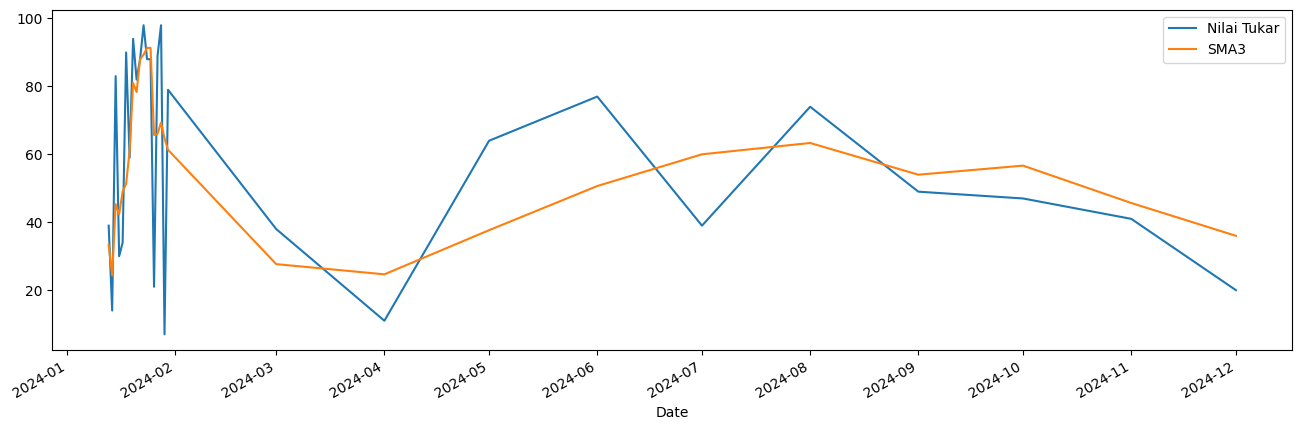

In [11]:
data[['Nilai Tukar','SMA3']].plot(label='NILAI TUKAR',
             figsize=(16, 5))

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error (data['Nilai Tukar'], data['SMA3'])

16.750000000000004

# *CUMULATIVE MOVING AVERAGE*

In [13]:
#Importing time-series data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',
           parse_dates =True)

#Printing dataFrame
data.head()

<ipython-input-13-7f2092a115e3>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',


,Nilai Tukar
Date,
2024-01-01,20
2024-02-01,25
2024-03-01,38
2024-04-01,11
2024-05-01,64


In [14]:
data = data ['Nilai Tukar'].to_frame()
data ['CMA3'] = data ['Nilai Tukar'].expanding().mean()
data

,Nilai Tukar,CMA3
Date,,
2024-01-01,20,20.000000
2024-02-01,25,22.500000
2024-03-01,38,27.666667
2024-04-01,11,23.500000
2024-05-01,64,31.600000
2024-06-01,77,39.166667
2024-07-01,39,39.142857
2024-08-01,74,43.500000
2024-09-01,49,44.111111


In [15]:
data.dropna(inplace=True)

#Printing Data Frame
data

,Nilai Tukar,CMA3
Date,,
2024-01-01,20,20.000000
2024-02-01,25,22.500000
2024-03-01,38,27.666667
2024-04-01,11,23.500000
2024-05-01,64,31.600000
2024-06-01,77,39.166667
2024-07-01,39,39.142857
2024-08-01,74,43.500000
2024-09-01,49,44.111111


<Axes: xlabel='Date'>

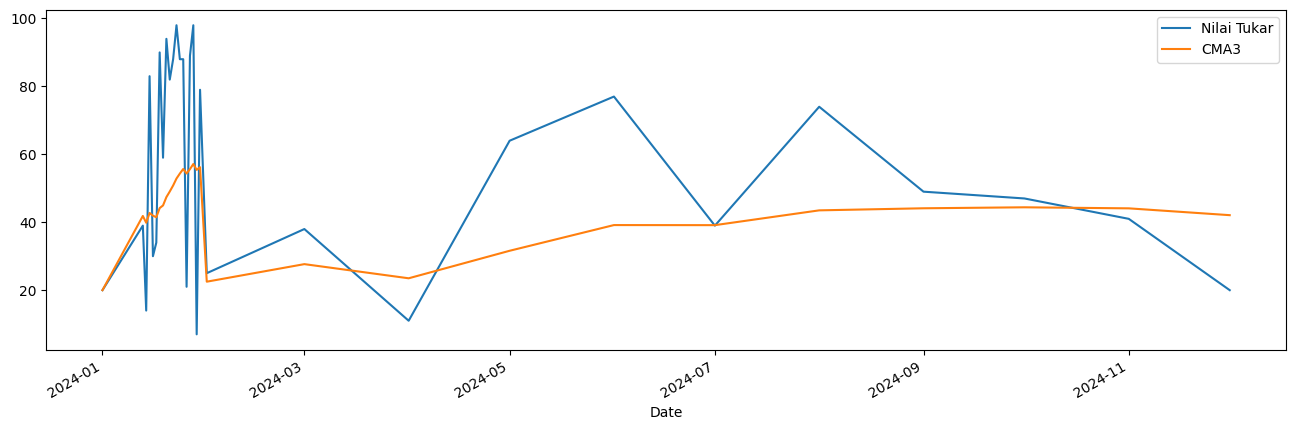

In [16]:
data[['Nilai Tukar','CMA3']].plot(label='NILAI TUKAR',
             figsize=(16, 5))

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error (data['Nilai Tukar'], data['CMA3'])

23.79251441335943

# *EXPONENTIAL MOVING AVERAGE*

In [18]:
#Importing time-series data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',
           parse_dates =True)

#Printing dataFrame
data.head()

<ipython-input-18-7f2092a115e3>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',


,Nilai Tukar
Date,
2024-01-01,20
2024-02-01,25
2024-03-01,38
2024-04-01,11
2024-05-01,64


In [19]:
data = data['Nilai Tukar'].to_frame()
data ['EWMA3'] = data ['Nilai Tukar'].ewm(span=3).mean()
data

,Nilai Tukar,EWMA3
Date,,
2024-01-01,20,20.000000
2024-02-01,25,23.333333
2024-03-01,38,31.714286
2024-04-01,11,20.666667
2024-05-01,64,43.032258
2024-06-01,77,60.285714
2024-07-01,39,49.559055
2024-08-01,74,61.827451
2024-09-01,49,55.401174


In [20]:
data.dropna(inplace=True)

#Printing Data Frame
data

,Nilai Tukar,EWMA3
Date,,
2024-01-01,20,20.000000
2024-02-01,25,23.333333
2024-03-01,38,31.714286
2024-04-01,11,20.666667
2024-05-01,64,43.032258
2024-06-01,77,60.285714
2024-07-01,39,49.559055
2024-08-01,74,61.827451
2024-09-01,49,55.401174


<Axes: xlabel='Date'>

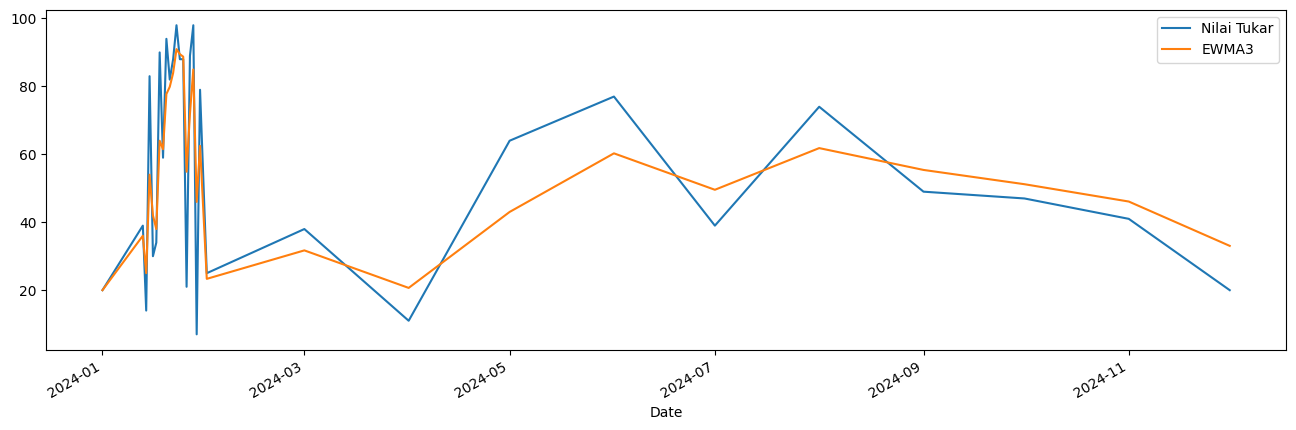

In [21]:
data[['Nilai Tukar','EWMA3']].plot(label='NILAI TUKAR',
             figsize=(16, 5))

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error (data['Nilai Tukar'], data['EWMA3'])

11.51370374680737

# *DOUBLE EXPONENTIAL SMOOTHING*

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [24]:
# Impor Data
data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv', index_col = 'Date',
           parse_dates =True)

# Printing dataFrame
data.head()

,Nilai Tukar
Date,
2024-01-01,20
2024-02-01,25
2024-03-01,38
2024-04-01,11
2024-05-01,64


In [25]:
df = pd.DataFrame(data, columns= ['Nilai Tukar'])
y = df['Nilai Tukar'].resample('D').mean()
y.head ()

Date
2024-01-01    20.0
2024-01-02     NaN
2024-01-03     NaN
2024-01-04     NaN
2024-01-05     NaN
Freq: D, Name: Nilai Tukar, dtype: float64

In [26]:
y.isnull().sum()
y = y.fillna(y.bfill())
print (y)

Date
2024-01-01    20.0
2024-01-02    39.0
2024-01-03    39.0
2024-01-04    39.0
2024-01-05    39.0
              ... 
2024-11-27    20.0
2024-11-28    20.0
2024-11-29    20.0
2024-11-30    20.0
2024-12-01    20.0
Freq: D, Name: Nilai Tukar, Length: 336, dtype: float64


In [27]:
train = y['01-01-2024':'01-24-2024']
len(train)
test = y['01-25-2024':'01-30-2024']
len(test)

6

In [28]:
print (train)

Date
2024-01-01    20.0
2024-01-02    39.0
2024-01-03    39.0
2024-01-04    39.0
2024-01-05    39.0
2024-01-06    39.0
2024-01-07    39.0
2024-01-08    39.0
2024-01-09    39.0
2024-01-10    39.0
2024-01-11    39.0
2024-01-12    39.0
2024-01-13    39.0
2024-01-14    14.0
2024-01-15    83.0
2024-01-16    30.0
2024-01-17    34.0
2024-01-18    90.0
2024-01-19    59.0
2024-01-20    94.0
2024-01-21    82.0
2024-01-22    88.0
2024-01-23    98.0
2024-01-24    88.0
Freq: D, Name: Nilai Tukar, dtype: float64


In [29]:
print(test)

Date
2024-01-25    88.0
2024-01-26    21.0
2024-01-27    89.0
2024-01-28    98.0
2024-01-29     7.0
2024-01-30    79.0
Freq: D, Name: Nilai Tukar, dtype: float64


In [30]:
# DICKEY-FULLER TEST

def is_stationary (y) :

  # HIPOTESIS :
  # H0 < 0.05 : Non-stationary
  # H1 > 0.05 : Stationary

  p_value = sm.tsa.stattools.adfuller (y) [1]
  if p_value < 0.05 :
    print (F"Result : Stationary (H0 : Non-stationary, p_value :{round(p_value, 3)})")
  else :
    print (F"Result : Non-Stationary (H0 : Non-stationary, p_value :{round(p_value, 3)})")

is_stationary(y)

Result : Non-Stationary (H0 : Non-stationary, p_value :0.16)


In [31]:
# Menghitung Nilai MAE
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=0.5,
                                                         smoothing_trend=0.5)
y_pred = des_model.forecast(6)
mean_absolute_error(test, y_pred)

38.71458494488534

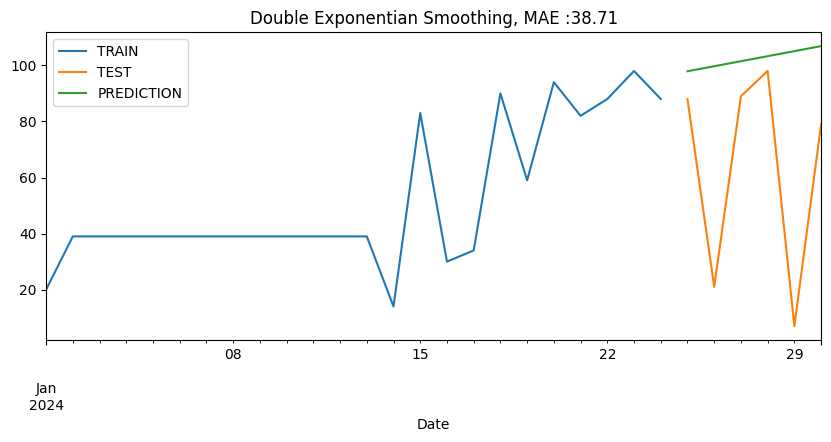

In [32]:
# Membuat plot
def plot_Nilai_Tukar(train, test, y_pred, title) :
  mae = mean_absolute_error(test, y_pred)
  train["2024" :].plot(legend=True, label="TRAIN", title=f"{title}, MAE :{round(mae, 2)}")
  test.plot(legend=True, label="TEST", figsize=(10,4))
  y_pred.plot (legend=True, label="PREDICTION")
  plt.show()

plot_Nilai_Tukar(train,test,y_pred,"Double Exponentian Smoothing")

# *ARIMA*

In [34]:
import pandas as pd

# Importing time-series data
data = pd.read_csv ('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv',names = ['value'], header =0)

# Printing Data Frame
data.head ()

,value
01/01/2024,20
02/01/2024,25
03/01/2024,38
04/01/2024,11
05/01/2024,64


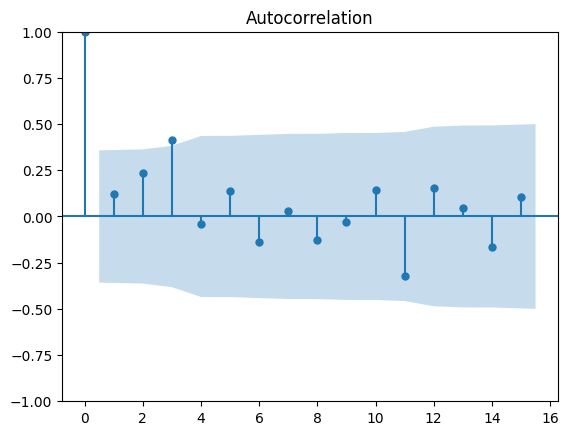

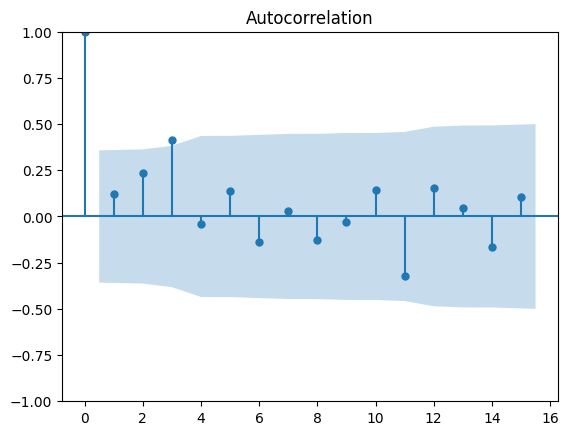

In [35]:
# Menampilkan plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.value)

In [36]:
# DICKEY-FULLER TEST

def is_stationary (data) :

  # HIPOTESIS :
  # H0 < 0.05 : Non-stationary
  # H1 > 0.05 : Stationary

  p_value = sm.tsa.stattools.adfuller (data) [1]
  if p_value < 0.05 :
    print (F"Result : Stationary (H0 : Non-stationary, p_value :{round(p_value, 3)})")
  else :
    print (F"Result : Non-Stationary (H0 : Non-stationary, p_value :{round(p_value, 3)})")

is_stationary(data)

Result : Non-Stationary (H0 : Non-stationary, p_value :0.919)


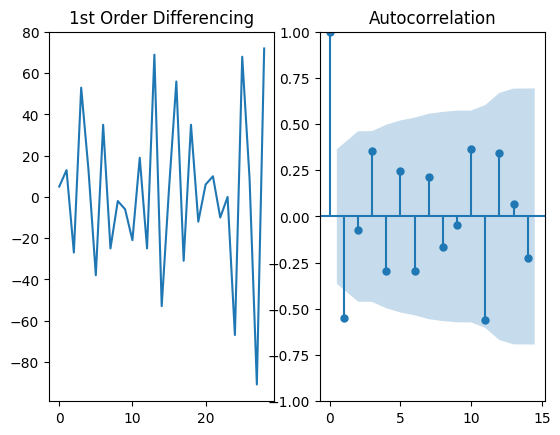

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan plot ACF setelah di forecasting 1st Order Differencing
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('1st Order Differencing')
plt.plot(np.array(data.value.diff().dropna()))

ax2 = f.add_subplot(122)
plot_acf(data.value.diff().dropna(), ax=ax2)
plt.show()

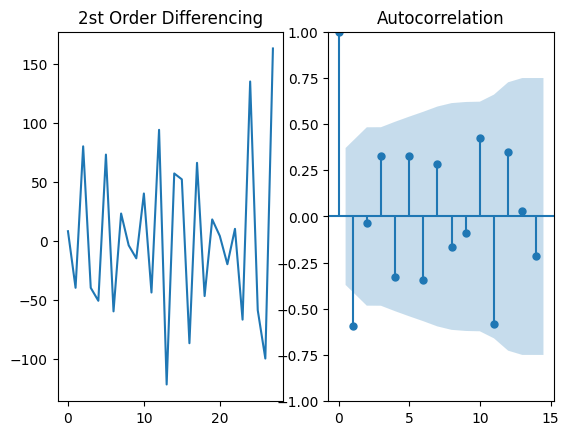

In [38]:
# Karena pada plot ACF 1st Order Differencing tidak stasioner, maka akan dilakukan forecasting kembali untuk mendapatkan hasil yang stasioner
# Menampilkan plot ACF setelah di forecasting 2st Oder Differencing
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('2st Order Differencing')
plt.plot(np.array(data.value.diff().diff().dropna()))

ax2 = f.add_subplot(122)
plot_acf(data.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [39]:
# DICKEY-FULLER TEST
is_stationary(data.value.diff().diff().dropna())

Result : Stationary (H0 : Non-stationary, p_value :0.007)


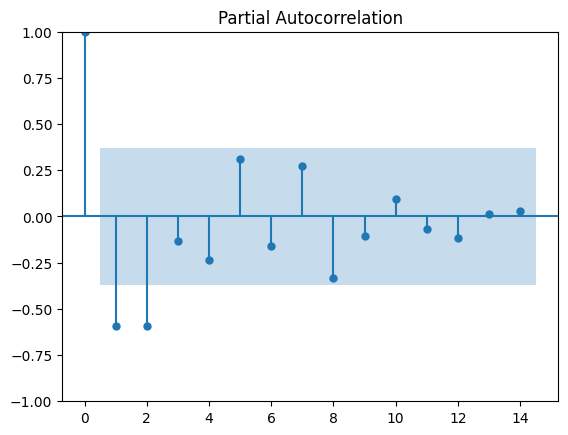

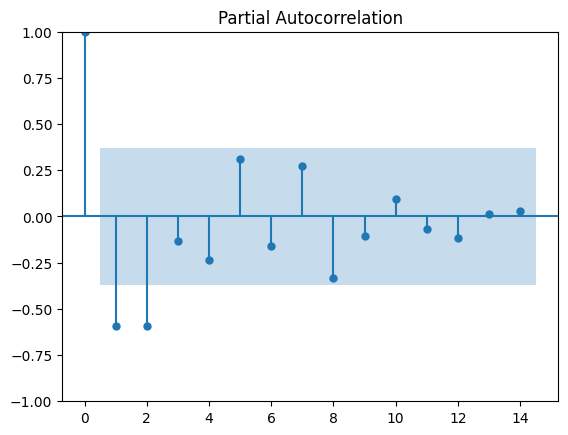

In [40]:
#Menampilkan plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.value.diff().diff().dropna())

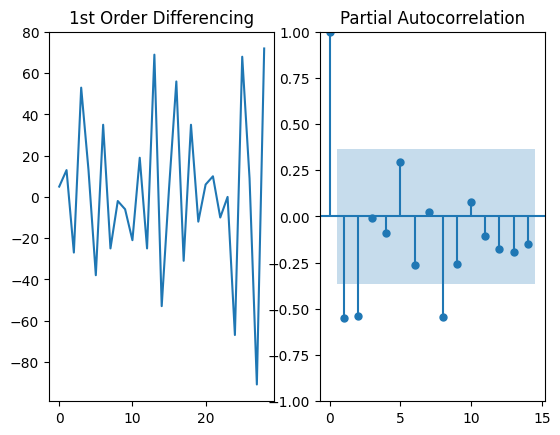

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan plot PACF setelah di forecasting 1st Order Differencing
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('1st Order Differencing')
plt.plot(np.array(data.value.diff().dropna()))

ax2 = f.add_subplot(122)
plot_pacf(data.value.diff().dropna(), ax=ax2)
plt.show()

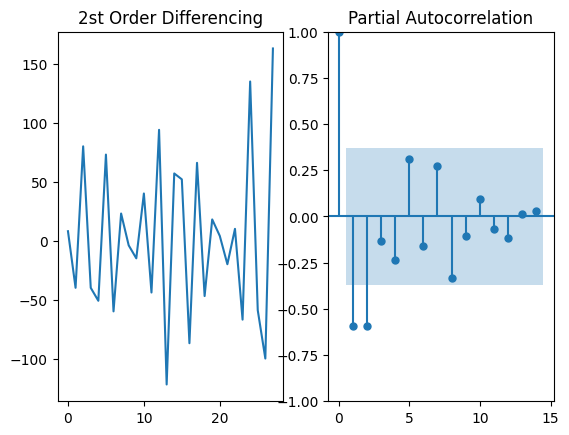

In [42]:
# Menampilkan plot ACF setelah di forecasting 2st Oder Differencing
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('2st Order Differencing')
plt.plot(np.array(data.value.diff().diff().dropna()))

ax2 = f.add_subplot(122)
plot_pacf(data.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [43]:
# DICKEY-FULLER TEST
is_stationary(data.value.diff().diff().dropna())

Result : Stationary (H0 : Non-stationary, p_value :0.007)


# *PEMODELAN ARIMA*

In [44]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(data.value, order=(0,0,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   30
Model:                          ARIMA   Log Likelihood                -144.292
Date:                Thu, 18 Jan 2024   AIC                            292.585
Time:                        08:38:00   BIC                            295.387
Sample:                             0   HQIC                           293.481
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2000      5.464     10.285      0.000      45.490      66.910
sigma2       881.4891    450.896      1.955      0.051      -2.250    1765.228
Ljung-Box (L1) (Q):                   0.49   Jarque-

In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Input Data
data = pd.read_csv('https://raw.githubusercontent.com/Asannaon/UAS_B2A021011_Tarsan/main/Nilai%20Tukar.csv')

# Konversi kolom Date ke format datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Menentukan parameter ARIMA
p_values = range(0, 3)  # Parameter autoregressive (AR)
d_values = range(0, 2)  # Parameter degree of differencing (I)
q_values = range(0, 3)  # Parameter moving average (MA)

# Loop untuk mencoba kombinasi parameter ARIMA
best_aic = float('inf')
best_order = None
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            model = ARIMA(data['Nilai Tukar'], order=order)
            results = model.fit()

            print(f'ARIMA Order: {order}, AIC: {results.aic}')

ARIMA Order: (0, 0, 0), AIC: 292.5848351609174
ARIMA Order: (0, 0, 1), AIC: 294.252179493211
ARIMA Order: (0, 0, 2), AIC: 294.0729909464097
ARIMA Order: (0, 1, 0), AIC: 297.1118922898325
ARIMA Order: (0, 1, 1), AIC: 283.2928133564762
ARIMA Order: (0, 1, 2), AIC: 281.00555315665105
ARIMA Order: (1, 0, 0), AIC: 294.11820705559694
ARIMA Order: (1, 0, 1), AIC: 294.10519895552983
ARIMA Order: (1, 0, 2), AIC: 288.6368950103459
ARIMA Order: (1, 1, 0), AIC: 287.51705020770237
ARIMA Order: (1, 1, 1), AIC: 284.0830703568159
ARIMA Order: (1, 1, 2), AIC: 284.2034869170561
ARIMA Order: (2, 0, 0), AIC: 294.2795893973789
ARIMA Order: (2, 0, 1), AIC: 294.5270781875246
ARIMA Order: (2, 0, 2), AIC: 295.11431324485994
ARIMA Order: (2, 1, 0), AIC: 279.74030257593495
ARIMA Order: (2, 1, 1), AIC: 278.33281275986957
ARIMA Order: (2, 1, 2), AIC: 279.3175492592114


In [46]:
# Memilih model dengan AIC terendah
if results.aic < best_aic:
  best_aic = results.aic
  best_order = order

# Menampilkan parameter terbaik
print("Best ARIMA Order:", best_order)
print("Best AIC:", best_aic)

Best ARIMA Order: (2, 1, 2)
Best AIC: 279.3175492592114
